In [2]:
using Revise # refresh automatically changes made in Hokusai
import Hokusai
using DataFrames

The basic method includes the number of clusters n as parameter and plots the clustered image as output.

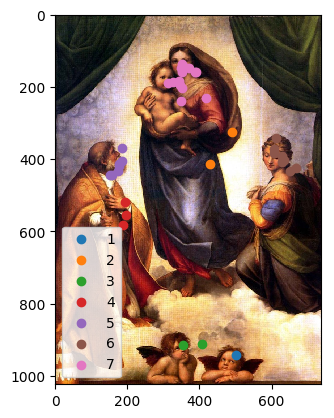

In [4]:
# image: 1-8
# person: 0- all corresponding subjects, else choose a subj from 1:length(corresponding subjects)
# mirrored: 0- not mirrored, 1 - mirrored
# startPos: 0-all, 52-left, 69-right

image = 1 
person = 5
mirrored = 0
startPos = 52
sigma = 80
tau = 40
n=7

Hokusai.run(image, n, sigma, tau, person, mirrored, startPos);

There are different criteria to determine the optimal number of clusters. The following method will compare them.
#### Spectral Gap Criterion: 
Schur decomposition:  $$\tilde{P}\tilde{X}=\tilde{X}\Lambda ,\ \tilde{P}:=D^{0.5}PD^{-0.5}.$$
Calculate absolute Schur values from weighted transition matrix and choose $n_c$ with greatest gap.

#### MinChi Criterion:
Make a clever initial guess $A_0$ and compute membership: $$\chi = XA_0.$$
Calculate the number of clusters that produces the highest $minChi$ value.
$$minChi := \min_{i\in\lbrace 1,\ldots,n_c\rbrace}\min_{k\in\lbrace 1,\ldots,N\rbrace}\chi_i(k)$$

#### Crispness Criterion:
For the projected transition matrix it holds: $$G(P)=\mathcal{S}\mathcal{P}\approx\mathcal{P},\text{ if }\mathcal{S}\approx I_{n_c},$$ where $\mathcal{P}$ is a row stochastic matrix. Therefore, compute: $$argmax_{n_c\in\mathbb{N}}\left(\frac{trace (S)}{n_c}\right)\leq 1 .$$

#### MinPc Criterion: 
The projected matrix maintains the Markovianity, but does not need to be a transition matrix itself. It can contain negative entries. Therefore, choose the $n_c$ with the highest minimal entry of the corresponding projected transition matrix.

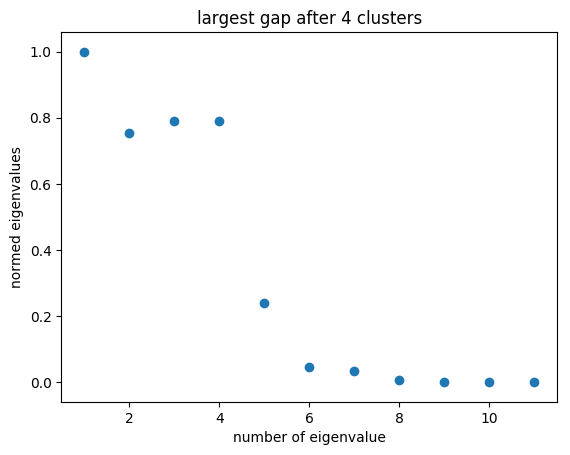

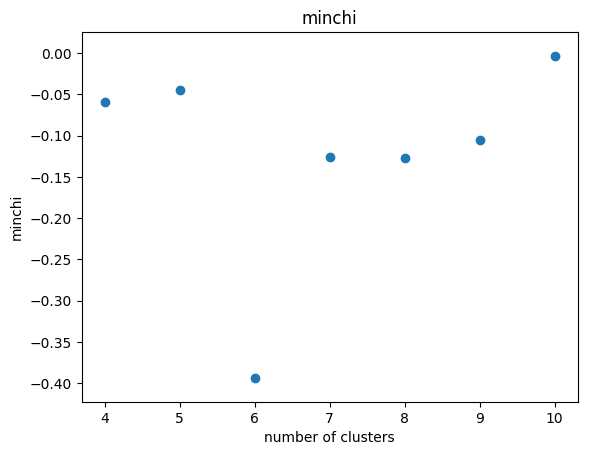

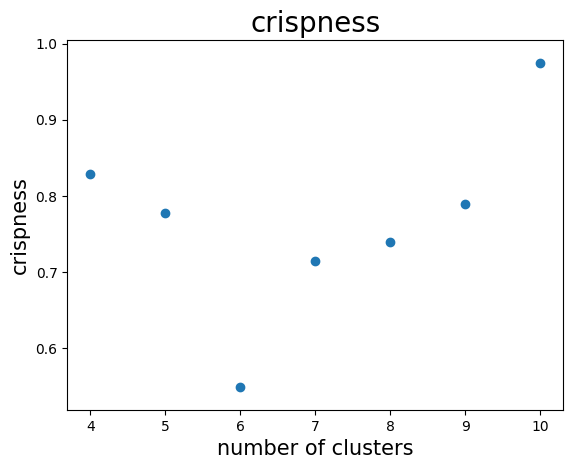

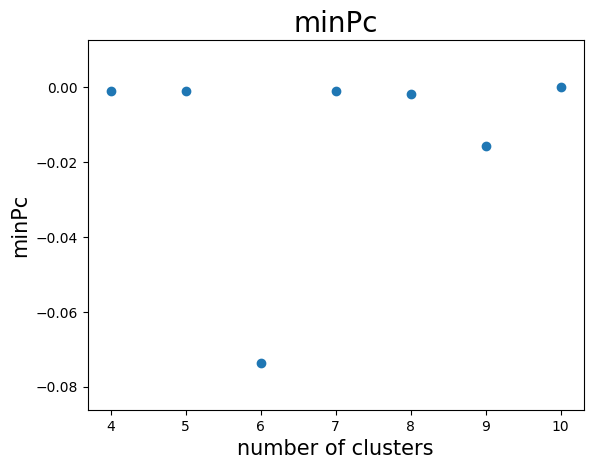

subject: hok_1001


In [6]:
image = 5 
person = 2
mirrored = 1
startPos = 52
sigma = 80
tau = 40
kmin = 4
kmax = 10

Hokusai.compareCriteria(image, person, sigma, tau, mirrored, startPos, kmin, kmax);

The "automated method" reduces the required input parameters from three to two. The number of clusters is computed automatically, which is the output of the "automatedNumber"-function. Furthermore, all steps are plotted to show the combination of the different criteria. Also, the final clustering and the corresponding membership vectors are plotted. The remaining parameters are the standard deviation sigma and the equidistant time step length tau.

subject: hok_1001
maximal gaps: [4, 1, 5, 7, 6]
maximal minchis: [5, 4, 7, 6]
posssible clusters: [5, 4]
crispness criterion: [5.0 0.795669; 4.0 0.828471]
final number of clusters: 4


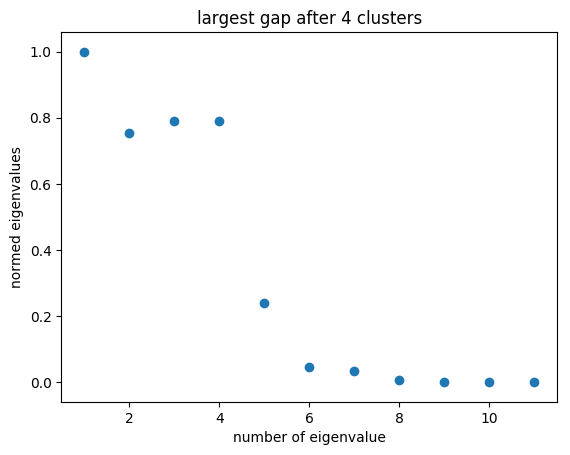

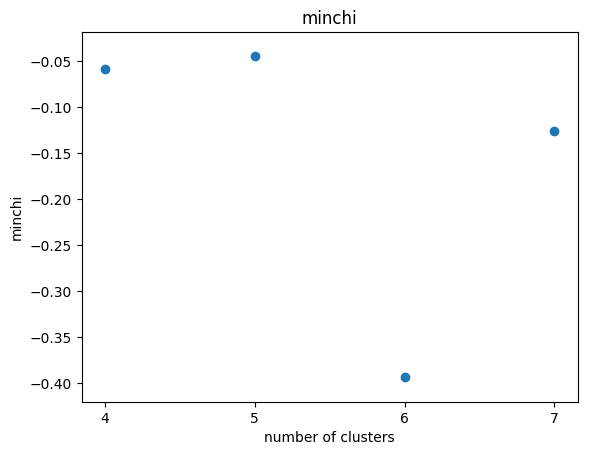

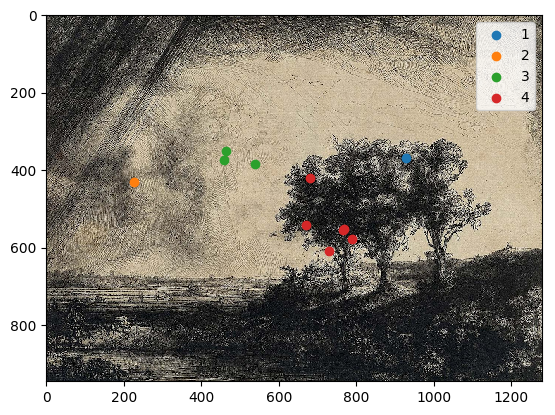

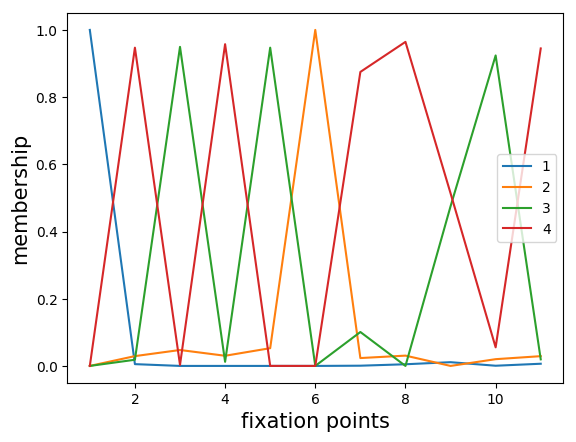

assignements: [1, 4, 3, 4, 3, 2, 4, 4, 4, 3, 4]


4

In [7]:
image = 5 
person = 2
mirrored = 1
startPos = 52
sigma = 80
tau = 40

Hokusai.automatedNumber(image, person, sigma, tau, mirrored, startPos)

The "meanNoCluster"-function gives the averaged number of clusters per image version and starting position.

In [8]:
image = 1 
mirrored = 0
startPos = 52
sigma = 80
tau = 40

Hokusai.meanNoCluster(image, mirrored, startPos, sigma, tau)

number of subjects: 33


4.82

Table comparing different averaged number of clusters.

In [9]:
sigma = 60
tau = 40
plot = 0

nbC = DataFrame( image = 1:8, m0sP52 = 0.0, m0sP69 = 0.0, m1sP52 = 0.0, m1sP69 = 0.0)
for image = 1:8
    nbC[image,[:m0sP52]] = Hokusai.meanNoCluster(image, 0, 52, sigma, tau)
    nbC[image,[:m0sP69]] = Hokusai.meanNoCluster(image, 0, 69, sigma, tau)
    nbC[image,[:m1sP52]] = Hokusai.meanNoCluster(image, 1, 52, sigma, tau)
    nbC[image,[:m1sP69]] = Hokusai.meanNoCluster(image, 1, 69, sigma, tau)
end
println(nbC)

number of subjects: 33
number of subjects: 32
number of subjects: 32
number of subjects: 29
number of subjects: 32
number of subjects: 29
number of subjects: 33
number of subjects: 32
number of subjects: 33
number of subjects: 32
number of subjects: 32
number of subjects: 29
number of subjects: 32
number of subjects: 29
number of subjects: 33
number of subjects: 32
number of subjects: 33
number of subjects: 31
number of subjects: 32
number of subjects: 30
number of subjects: 32
number of subjects: 30
number of subjects: 33
number of subjects: 31
number of subjects: 33
number of subjects: 31
number of subjects: 32
number of subjects: 30
number of subjects: 32
number of subjects: 30
number of subjects: 33
number of subjects: 31
8×5 DataFrame
│ Row │ image │ m0sP52  │ m0sP69  │ m1sP52  │ m1sP69  │
│     │ Int64 │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼───────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 1     │ 5.76    │ 6.22    │ 5.56    │ 5.55    │
│ 2   │ 2     │ 5.06    │ 

The following two functions analyse the relation between the $n_c$ and the remaining two parameters.

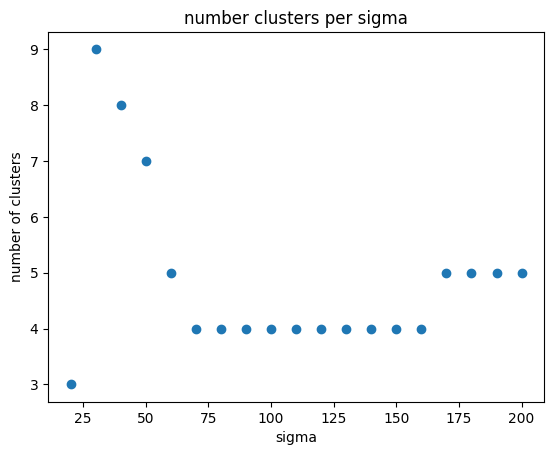

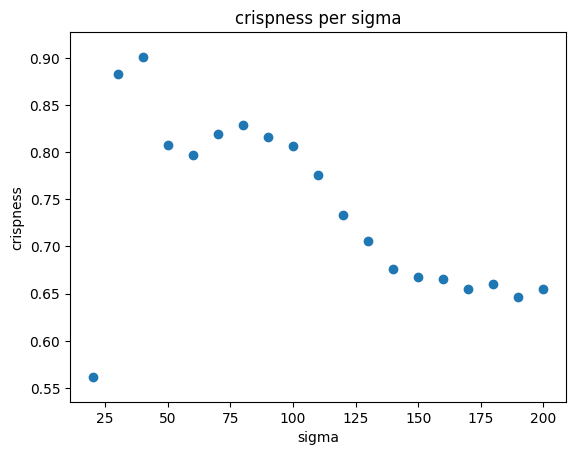

In [10]:
image = 5 
person = 2
mirrored = 1
startPos = 52
sigmin = 2 #*10
sigmax = 20 #*10

Hokusai.ncPerSigma(image, person, tau, mirrored, startPos, sigmin, sigmax);

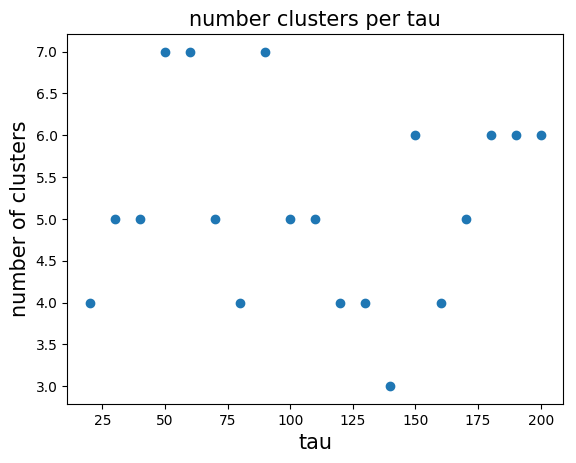

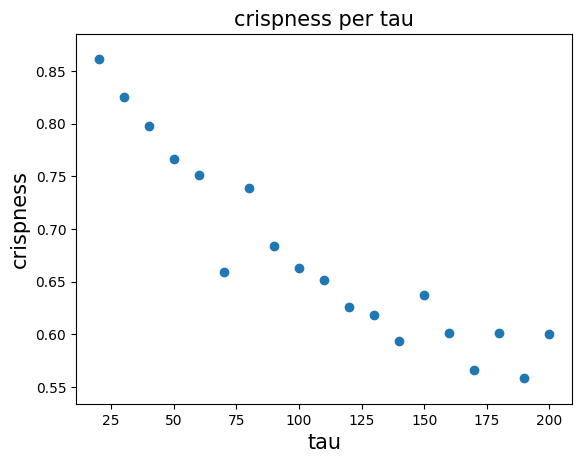

In [11]:
image = 5 
person = 2
mirrored = 1
startPos = 52
taumin = 2 #*10
taumax = 20 #*10

Hokusai.ncPerTau(image, person, sigma, mirrored, startPos, taumin, taumax);

The projected transition matrix can be calculated as follows:
$$G(P):=\left(\chi^TD\chi\right)^{-1}\left(\chi^TDP\chi\right),$$
where $D=diagm(\pi )$.

subject: hok_1024
maximal gaps: [12, 10, 9, 7, 15]
maximal minchis: [12, 9, 11, 10]
posssible clusters: [12, 9, 10]
crispness criterion: [12.0 0.737518; 9.0 0.6531; 10.0 0.632256]
final number of clusters: 12


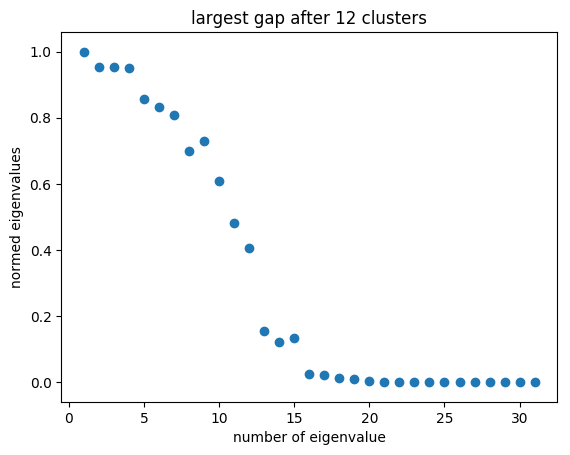

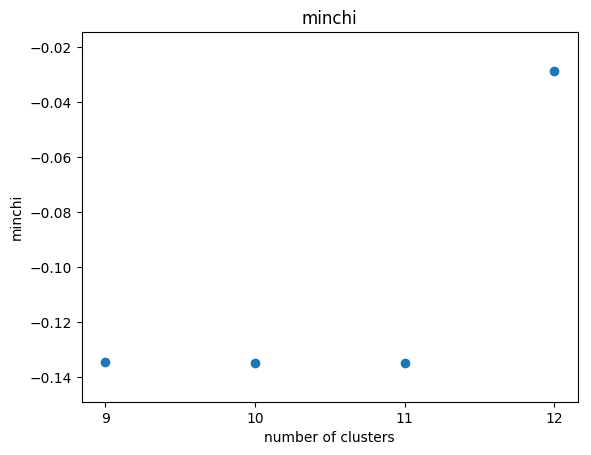

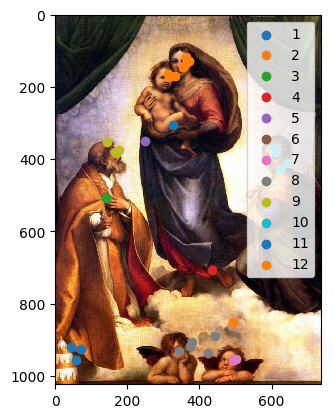

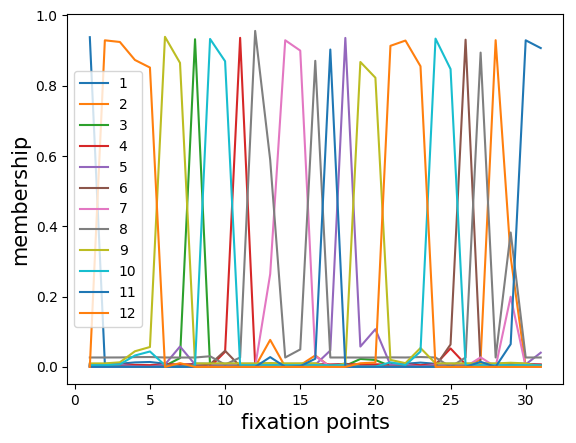

assignements: [1, 12, 12, 12, 12, 9, 9, 3, 10, 10, 4, 8, 8, 7, 7, 8, 11, 5, 9, 9, 12, 12, 12, 10, 10, 6, 8, 2, 8, 11, 11]


12×12 Array{Float64,2}:
  0.679805    -0.00198626   0.000615424  …  -0.0014396    0.187435  
  0.00228467   0.547958     0.00022671       0.0528034   -0.00229044
  0.00218198  -0.00180779   0.734686        -0.00138105  -0.00196561
  0.0021299    0.00336409   0.000246442      0.00113699  -0.00226206
  0.0982024   -0.00197133   0.0118232       -0.00143556   0.0251716 
  0.00216415   0.00434374   0.00024704   …   0.00126946  -0.0022775 
  0.00221403   0.0652171    0.00023596       0.0182592   -0.002276  
  0.00219998   0.0769043    0.000235978      0.0503004   -0.00228001
 -0.00113205  -0.00196724   0.0500737       -0.00143425   0.0396661 
  0.00224184  -0.000826     0.000251812     -0.00106158  -0.00232087
  0.00216569  -0.00197456   0.000523661  …   0.950894    -0.00216085
  0.00352658  -0.00204243  -0.00059378      -0.00145378   0.968471  

In [6]:
image = 1
person = 7
sigma = 40
tau = 40
mirrored = 0
startPos = 52

noCluster, P, pi, chi = Hokusai.automatedNumber(image, person, sigma, tau, mirrored, startPos, 1, 1)
G_P = Hokusai.calculatePc(chi, pi, P)